In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
y = df.iloc[0:100, -1].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

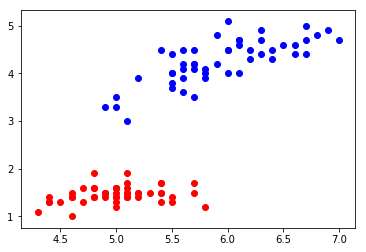

In [4]:
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue')
plt.scatter(X[:50, 0], X[:50, 1], color='red')
plt.show()

## Perceptron
Weights are updated in every row of dataset

### Learning rate
Please note that the learning rate η (eta) only has an effect on the classification outcome if the weights are initialized to non-zero values. If all the weights are initialized to 0, the learning rate parameter eta affects only the scale of the weight vector but not its direction.

In [6]:
class Perceptron(object):
    """Perceptron Classifier
    Parameters
    ---------------
    learning_rate (float): Learning constant - between 0.0 and 1.0
    n_epochs (int): Number of learning iterations
    
    Attributes
    ---------------
    
    """
    
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
    
    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1] + 1)
        self.errors_ = []
        
        for _ in range(self.n_epochs):
            errors = 0
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                update = self.learning_rate * (label - prediction)
                self.w_[1:] += update * inputs
                # Store BIAS weight
                self.w_[0] += update
                print(self.w_)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def summarize(self, inputs):
        return np.dot(inputs, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.summarize(X) >= 0.0, 1, -1)

In [7]:
ppn = Perceptron(learning_rate=0.1, n_epochs=10)
ppn.fit(X,y)

[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]
[-0.2  -1.02 -0.28]


### Number of missclassification overtime

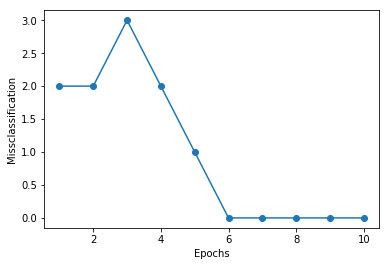

In [67]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Missclassification')
plt.show()

In [65]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


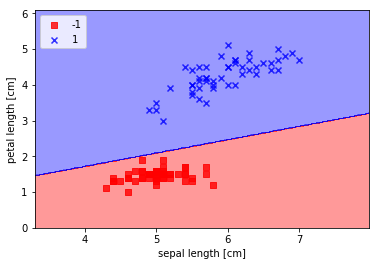

In [66]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()